In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ptfrwrd","key":"4a2f5a982ed53062345976efa42bd4c8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! kaggle datasets  download -d  deepu1109/star-dataset      

  0% 0.00/3.16k [00:00<?, ?B/s]
100% 3.16k/3.16k [00:00<00:00, 5.99MB/s]


In [7]:
! mkdir data
! unzip star-dataset.zip -d data

Archive:  star-dataset.zip
  inflating: data/6 class csv.csv    


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA:

keep in mind:
- Brown Dwarf -> Star Type = 0
- Red Dwarf -> Star Type = 1
- White Dwarf-> Star Type = 2
- Main Sequence -> Star Type = 3
- Supergiant -> Star Type = 4
- Hypergiant -> Star Type = 5

Let`s download and see the data:

In [9]:
data = pd.read_csv('data/6 class csv.csv')
data.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [10]:
data.shape

(240, 7)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [21]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


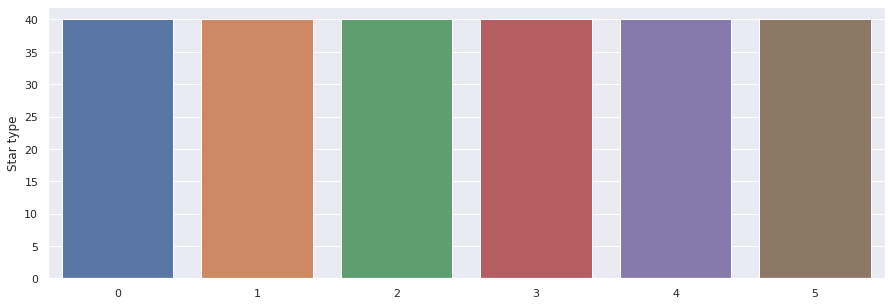

In [15]:
sns.set(style="darkgrid")
stars_types = pd.DataFrame(data['Star type'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(15,5))
ax = sns.barplot(x = stars_types.index, y = 'Star type' , data = stars_types)

[Text(0, 0, 'Red'),
 Text(0, 0, 'Blue'),
 Text(0, 0, 'Blue-white'),
 Text(0, 0, 'Blue White'),
 Text(0, 0, 'yellow-white'),
 Text(0, 0, 'White'),
 Text(0, 0, 'white'),
 Text(0, 0, 'Blue white'),
 Text(0, 0, 'Yellowish White'),
 Text(0, 0, 'yellowish'),
 Text(0, 0, 'Whitish'),
 Text(0, 0, 'Orange'),
 Text(0, 0, 'Blue '),
 Text(0, 0, 'Blue-White'),
 Text(0, 0, 'White-Yellow'),
 Text(0, 0, 'Blue white '),
 Text(0, 0, 'Pale yellow orange'),
 Text(0, 0, 'Orange-Red'),
 Text(0, 0, 'Yellowish')]

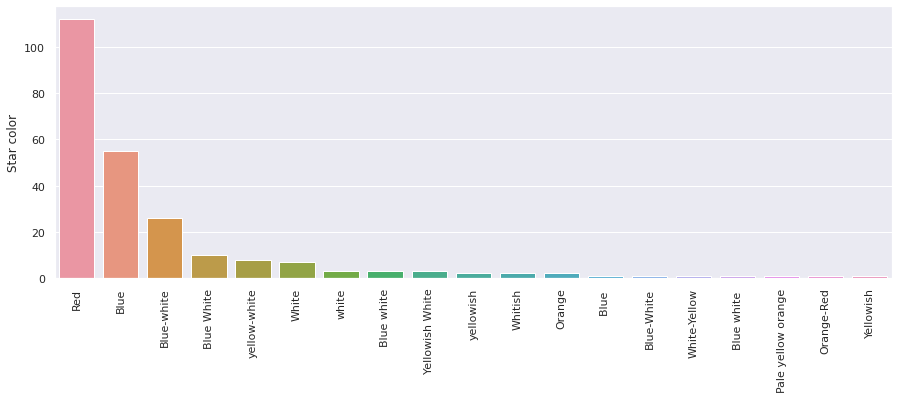

In [17]:
stars_color = pd.DataFrame(data['Star color'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(15,5))
ax = sns.barplot(x = stars_color.index, y = 'Star color' , data = stars_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'M'),
 Text(0, 0, 'B'),
 Text(0, 0, 'O'),
 Text(0, 0, 'A'),
 Text(0, 0, 'F'),
 Text(0, 0, 'K'),
 Text(0, 0, 'G')]

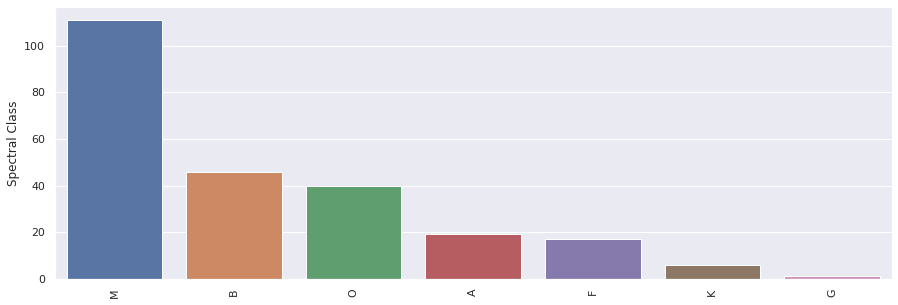

In [19]:
stars_spectral = pd.DataFrame(data['Spectral Class'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(15,5))
ax = sns.barplot(x = stars_spectral.index, y = 'Spectral Class' , data = stars_spectral)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

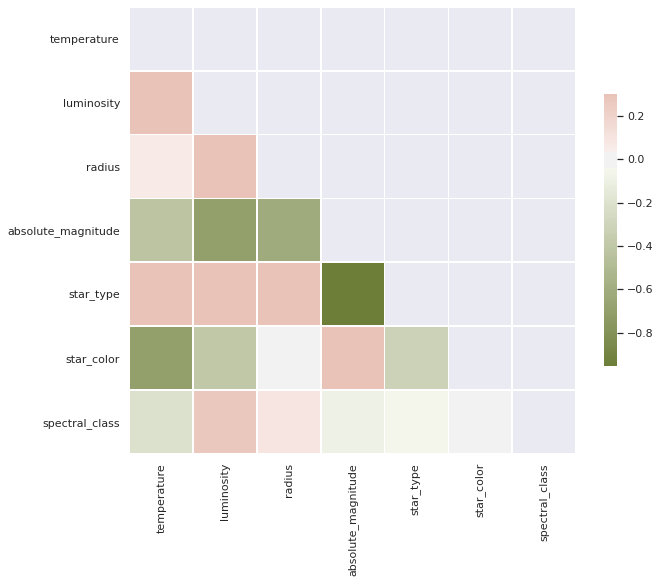

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
temperature,1.000000,0.393404,0.064216,-0.420261,0.411129,-0.697438,-0.207852
luminosity,0.393404,1.000000,0.526516,-0.692619,0.676845,-0.393509,0.275280
radius,0.064216,0.526516,1.000000,-0.608728,0.660975,-0.000818,0.097124
absolute_magnitude,-0.420261,-0.692619,-0.608728,1.000000,-0.955276,0.333552,-0.085840
star_type,0.411129,0.676845,0.660975,-0.955276,1.000000,-0.317103,-0.049131
star_color,-0.697438,-0.393509,-0.000818,0.333552,-0.317103,1.000000,-0.006298
spectral_class,-0.207852,0.275280,0.097124,-0.085840,-0.049131,-0.006298,1.000000


In [22]:
stars_data = {
    'temperature': data['Temperature (K)'],
    'luminosity': data['Luminosity(L/Lo)'],
    'radius': data['Radius(R/Ro)'],
    'absolute_magnitude': data['Absolute magnitude(Mv)'],
    'star_type': data['Star type'],
    'star_color': data['Star color'],
    'spectral_class': data['Spectral Class']
}
stars_data = pd.DataFrame.from_dict(stars_data)
stars_data['star_type'] = stars_data['star_type'].astype('category').cat.codes
stars_data['star_color'] = stars_data['star_color'].astype('category').cat.codes
stars_data['spectral_class'] = stars_data['spectral_class'].astype('category').cat.codes

corr = stars_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(100, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
corr

And we can see the most high dependenses between:
- temp and radius;
- star_type and star_color, spectral_class;
- star_color and radius, spectral_class.

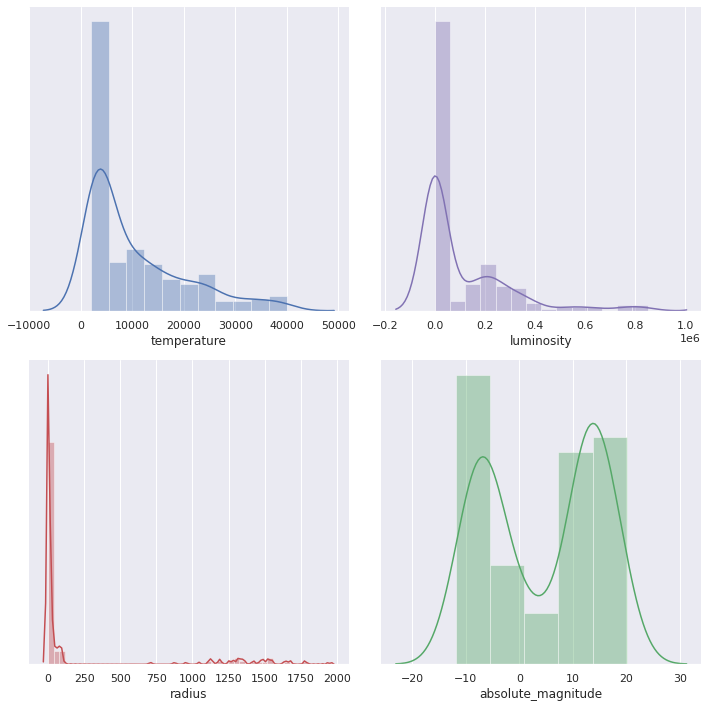

In [35]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.despine(left=True)

sns.distplot(stars_data['temperature'], color='b', ax=axes[0, 0])
sns.distplot(stars_data['luminosity'], color='m', ax=axes[0, 1])
sns.distplot(stars_data['radius'], color='r', ax=axes[1, 0])
sns.distplot(stars_data['absolute_magnitude'], color='g', ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

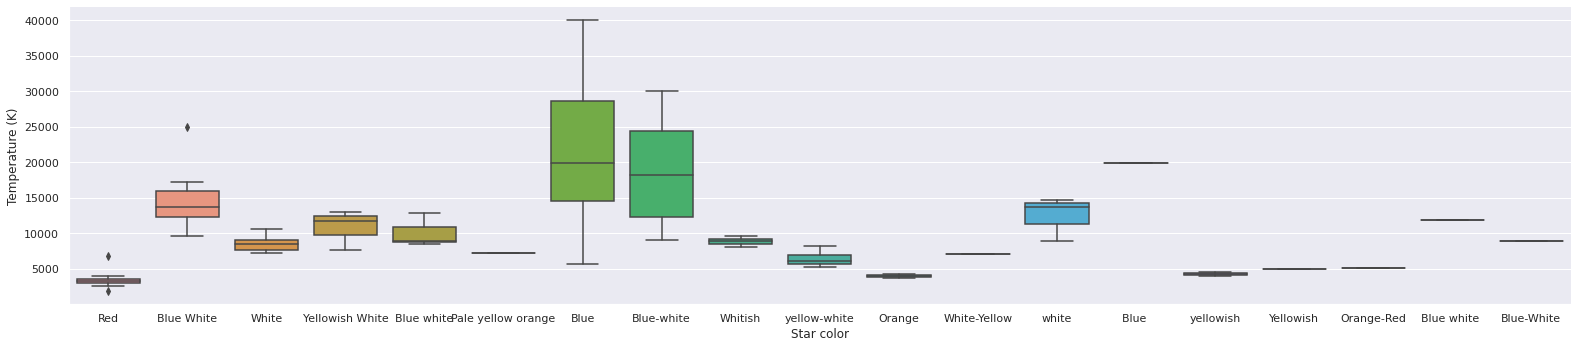

In [47]:
ax = sns.catplot(x = 'Star color', y = 'Temperature (K)', kind = "box", data = data)
ax.fig.set_size_inches(30, 5)

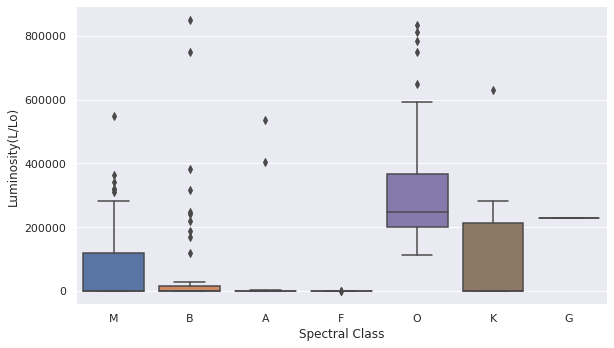

In [50]:
ax = sns.catplot(x = 'Spectral Class', y = 'Luminosity(L/Lo)', kind = "box", data = data)
ax.fig.set_size_inches(10, 5)

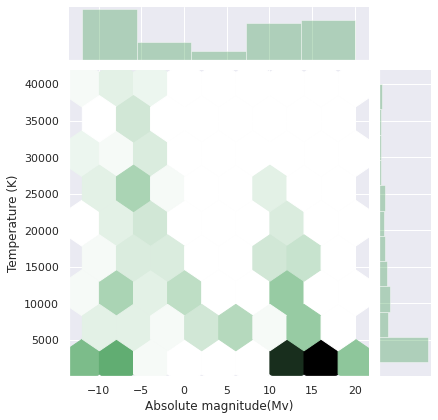

In [58]:
sns.jointplot(x='Absolute magnitude(Mv)', y='Temperature (K)', data=data, kind='hex', color='g')

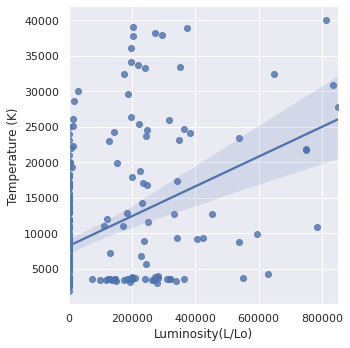

In [56]:
sns.lmplot(x='Luminosity(L/Lo)', y='Temperature (K)', data=data, palette="muted")

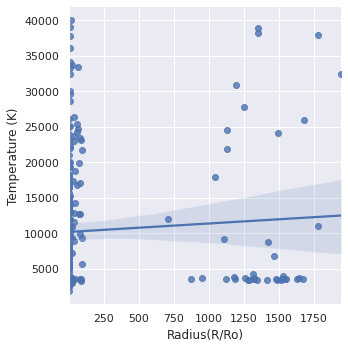

In [57]:
sns.lmplot(x='Radius(R/Ro)', y='Temperature (K)', data=data, palette="muted")

# Classification. Decision Tree

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stars_data.drop('star_type',axis=1), stars_data['star_type'], test_size=0.20, random_state=42)

In [63]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,predictions)


array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 11]])

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [70]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [77]:
data_feat = stars_data.drop('star_type',axis=1)
features = list(data_feat.columns)

In [72]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

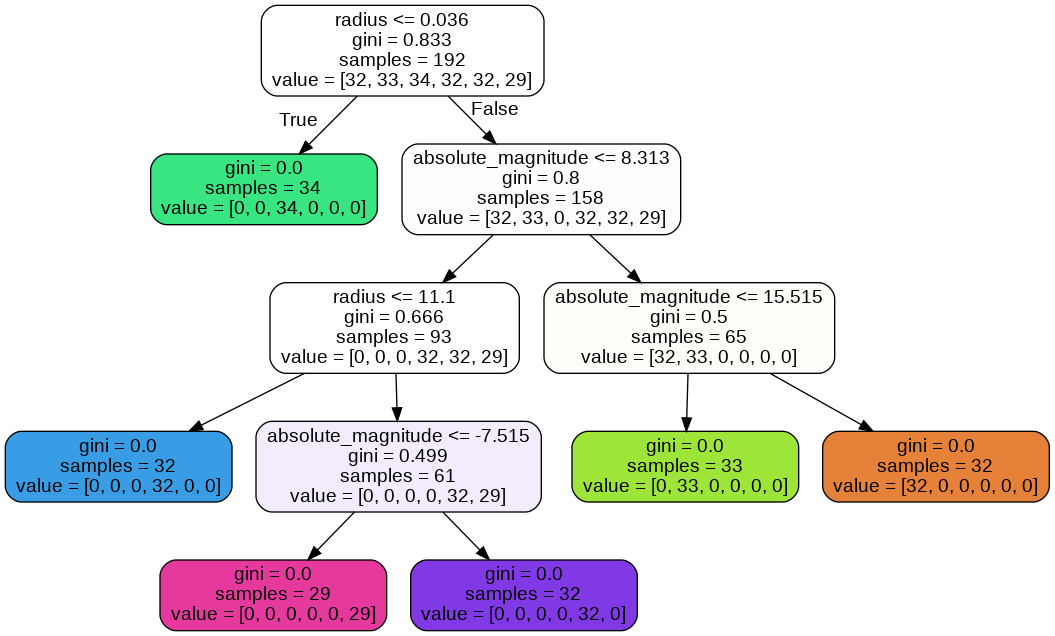

In [73]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# Classification. Logistic Regression

Try Logistic Regression with all features:

In [79]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.29      0.44         7
           2       0.67      1.00      0.80         6
           3       1.00      0.50      0.67         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.81        48
   macro avg       0.86      0.80      0.77        48
weighted avg       0.88      0.81      0.79        48



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Based on EDA, we can say that star color, spectral class have the greatest impact on star type:

In [81]:
features_data = pd.DataFrame({'color': stars_data['star_color'], 'spectral_class': stars_data['spectral_class'], 'star_type': stars_data['star_type']})
X_train, X_test, y_train, y_test = train_test_split(features_data.drop('star_type',axis=1), features_data['star_type'], test_size=0.20, random_state=42)

In [82]:
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.32      1.00      0.48         7
           2       0.45      0.83      0.59         6
           3       0.33      0.12      0.18         8
           4       0.70      0.88      0.78         8
           5       0.50      0.09      0.15        11

    accuracy                           0.44        48
   macro avg       0.38      0.49      0.36        48
weighted avg       0.39      0.44      0.34        48



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Use only two features is bad idea, let`s add another features:

In [84]:
features_data['temp'] = pd.Series(stars_data['temperature'], index = features_data.index)
features_data['radius'] = pd.Series(stars_data['radius'], index = features_data.index)

X_train, X_test, y_train, y_test = train_test_split(features_data.drop('star_type',axis=1), features_data['star_type'], test_size=0.20, random_state=42)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.41      1.00      0.58         7
           2       0.83      0.83      0.83         6
           3       0.83      0.62      0.71         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           0.75        48
   macro avg       0.68      0.74      0.69        48
weighted avg       0.70      0.75      0.70        48



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Look better, add luminosity:


In [85]:
features_data['luminosity'] = pd.Series(stars_data['luminosity'], index = features_data.index)
X_train, X_test, y_train, y_test = train_test_split(features_data.drop('star_type', axis=1), features_data['star_type'], test_size=0.20, random_state=42)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         7
           2       0.25      1.00      0.40         6
           3       1.00      0.50      0.67         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.60        48
   macro avg       0.52      0.58      0.50        48
weighted avg       0.58      0.60      0.55        48



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So, quality has decreased.

In [89]:
features_data['absolute_magnitude'] = pd.Series(stars_data['absolute_magnitude'], index = features_data.index)
del features_data['luminosity']

X_train, X_test, y_train, y_test = train_test_split(features_data.drop('star_type', axis=1), features_data['star_type'], test_size=0.20, random_state=42)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7
           2       0.86      1.00      0.92         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      0.91      0.95        11

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.95      0.94      0.94        48



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We see the quality has improved without using luminosity.